# Music Dataset Quality Control

Dataset: https://openneuro.org/datasets/ds003720/versions/1.0.1

This notebook will look at basic aspects of the data, such as:
- Shape of data (i.e. (x,y,z))
- Repitition Time (TR)

After looking at the data, we generate the following:
- Mean EPI Images
- Masks
- Example Voxel Time Series


In [1]:
# import necessary libraries
from pathlib import Path
import numpy as np
import nibabel as nib
from nilearn import image, masking, plotting
from nilearn.plotting import plot_img, plot_anat
import matplotlib.pyplot as plt
import os

DATA_ROOT = Path("./data") # 
DERIV_ROOT = Path("./derivatives/music")

In [2]:
# get bold files for all subject, both task and training, but only run-02

bold_files = sorted(
    DATA_ROOT.glob("music/sub-*_task-Test_run-02_bold.nii*")
)

print("Found BOLD runs (run-02):", len(bold_files))
for f in bold_files:
    print(" ", f)

if not bold_files:
    raise FileNotFoundError(
        "No BOLD files found"
    )

Found BOLD runs (run-02): 5
  data\music\sub-001_task-Test_run-02_bold.nii
  data\music\sub-002_task-Test_run-02_bold.nii
  data\music\sub-003_task-Test_run-02_bold.nii
  data\music\sub-004_task-Test_run-02_bold.nii
  data\music\sub-005_task-Test_run-02_bold.nii


In [3]:
sub_imgs = []
# check all bold files
for bold_file in bold_files:
    img = nib.load(bold_file) 
    sub_imgs.append(img)
    # print shape (i.e. dimensions)
    print(f"Shape: {img.shape}")
    # print zooms of form (x, y, z, t)
    print(f"Zooms: {img.header.get_zooms()}")

    # Mean image and mask
    mean_img = image.mean_img(img)
    mask_img = masking.compute_epi_mask(img)
    
    # subject ID: "sub-XX"
    sub_id = bold_file.name.split("_")[0]
    
    # Save mask: derivatives/movie/<sub-id>_run-02_mask.nii.gz
    mask_name = f"{sub_id}_run-02_mask.nii.gz"
    mask_path = DERIV_ROOT / mask_name
    mask_img.to_filename(mask_path)
    print("Saved mask to:", mask_path)

Shape: (96, 96, 68, 410)
Zooms: (2.0, 2.0, 2.0, 1.5)


C:\Users\Nirwaan Azhar\AppData\Local\Temp\ipykernel_13216\974530692.py:12: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  mean_img = image.mean_img(img)


Saved mask to: derivatives\music\sub-001_run-02_mask.nii.gz
Shape: (96, 96, 68, 410)
Zooms: (2.0, 2.0, 2.0, 1.5)
Saved mask to: derivatives\music\sub-002_run-02_mask.nii.gz
Shape: (96, 96, 68, 410)
Zooms: (2.0, 2.0, 2.0, 1.5)
Saved mask to: derivatives\music\sub-003_run-02_mask.nii.gz
Shape: (96, 96, 68, 410)
Zooms: (2.0, 2.0, 2.0, 1.5)
Saved mask to: derivatives\music\sub-004_run-02_mask.nii.gz
Shape: (96, 96, 68, 410)
Zooms: (2.0, 2.0, 2.0, 1.5)
Saved mask to: derivatives\music\sub-005_run-02_mask.nii.gz


C:\Users\Nirwaan Azhar\AppData\Local\Temp\ipykernel_13216\504196736.py:3: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  mean_img = image.mean_img(sub_img)


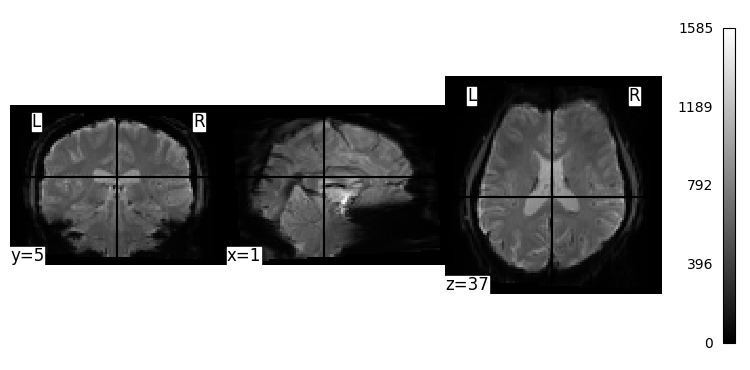

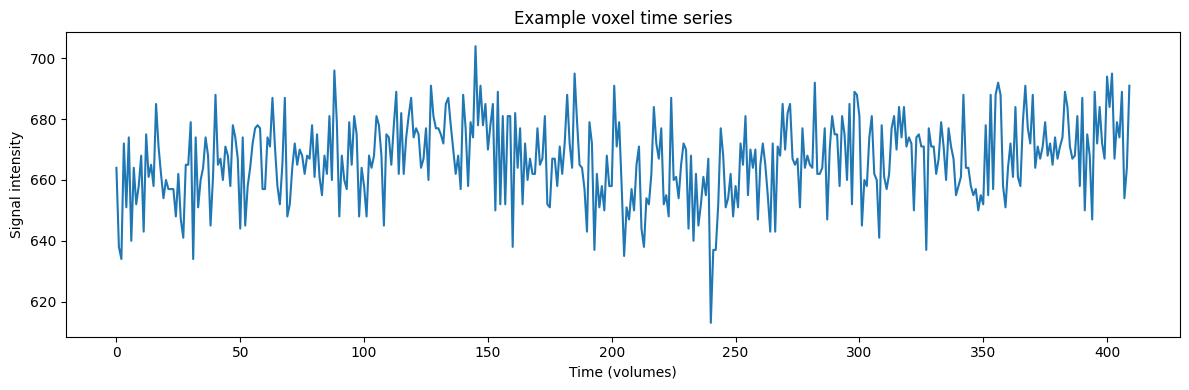

C:\Users\Nirwaan Azhar\AppData\Local\Temp\ipykernel_13216\504196736.py:3: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  mean_img = image.mean_img(sub_img)


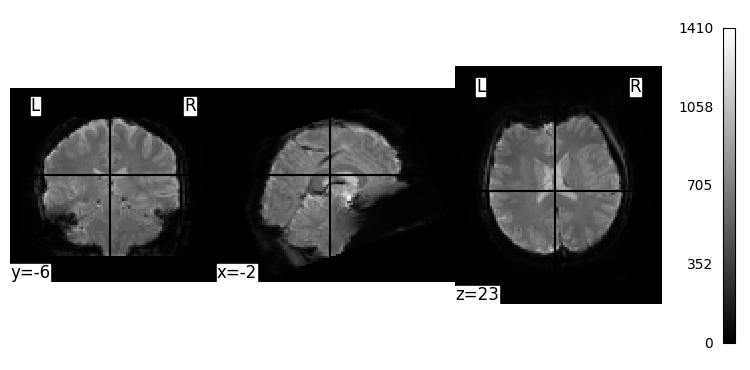

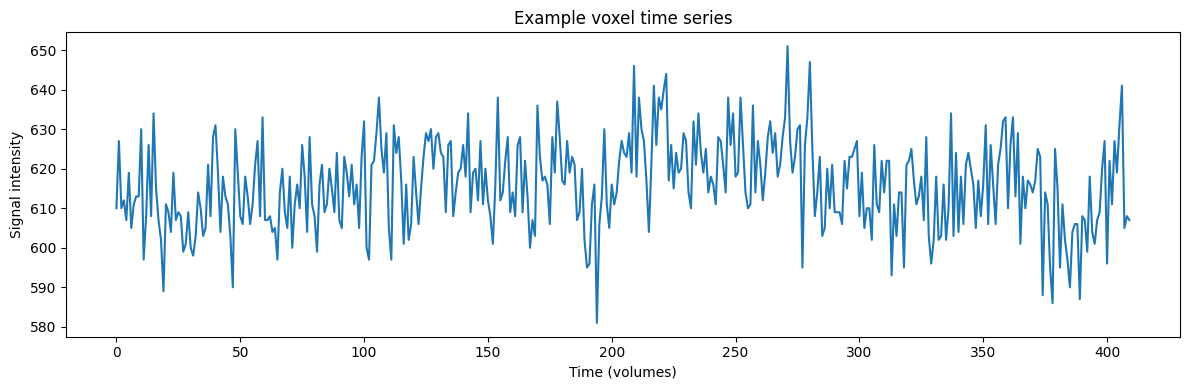

C:\Users\Nirwaan Azhar\AppData\Local\Temp\ipykernel_13216\504196736.py:3: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  mean_img = image.mean_img(sub_img)


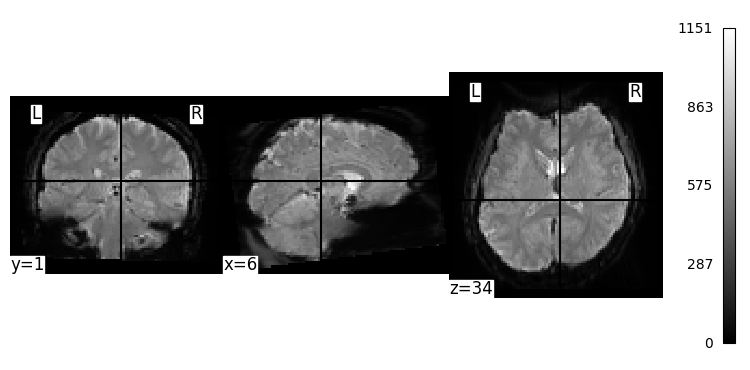

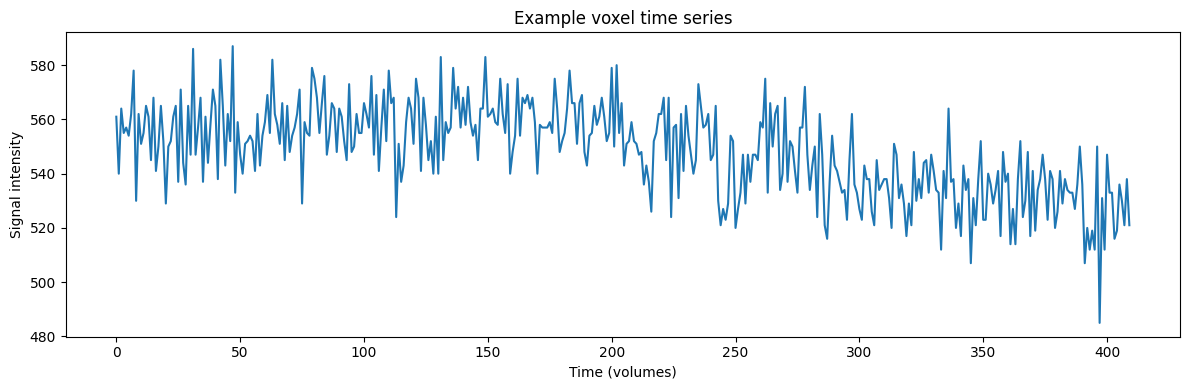

C:\Users\Nirwaan Azhar\AppData\Local\Temp\ipykernel_13216\504196736.py:3: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  mean_img = image.mean_img(sub_img)


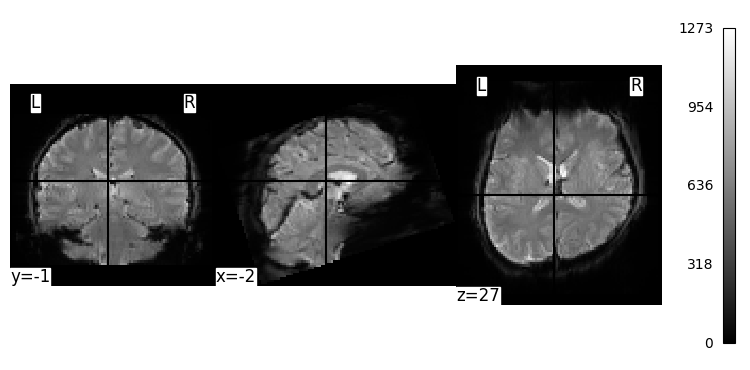

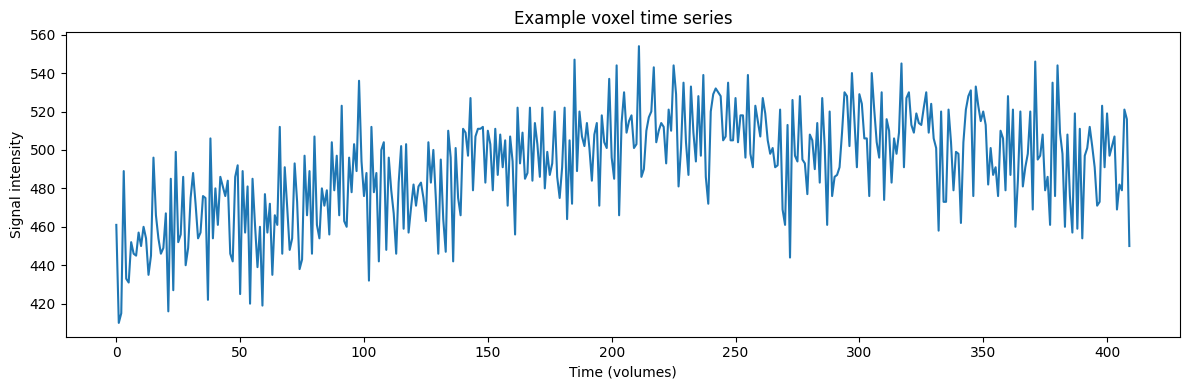

C:\Users\Nirwaan Azhar\AppData\Local\Temp\ipykernel_13216\504196736.py:3: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  mean_img = image.mean_img(sub_img)


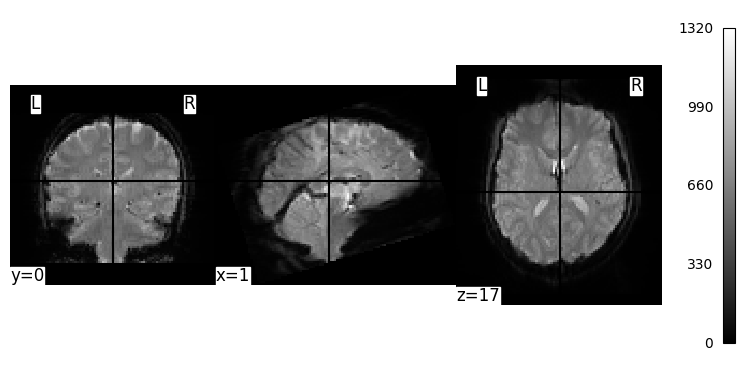

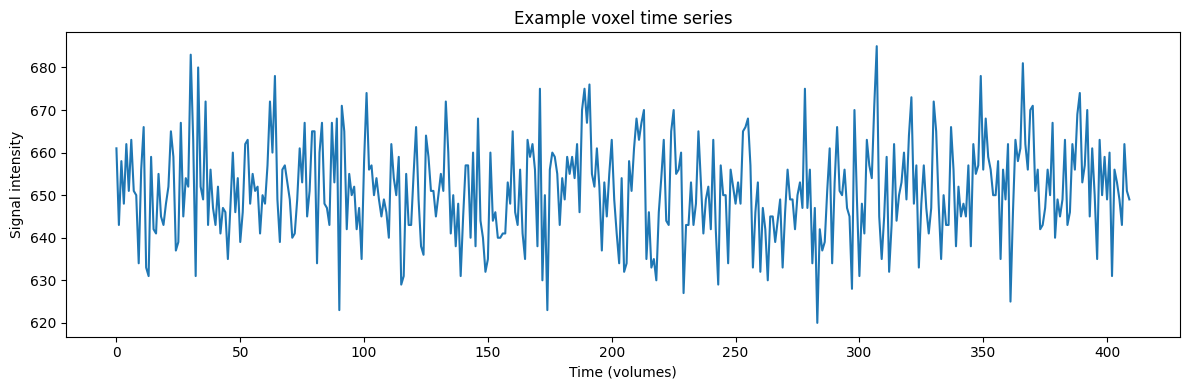

In [4]:
for sub_img in sub_imgs:
    # mean EPI images
    mean_img = image.mean_img(sub_img)
    plot_img(mean_img, cbar_tick_format="%i")
    # extract and plot a voxel time series
    voxel_data = sub_img.get_fdata()[30, 30, 20, :]
    plt.figure(figsize=(12, 4))
    plt.plot(voxel_data)
    plt.xlabel('Time (volumes)')
    plt.ylabel('Signal intensity')
    plt.title('Example voxel time series')
    plt.tight_layout()
    plt.show()